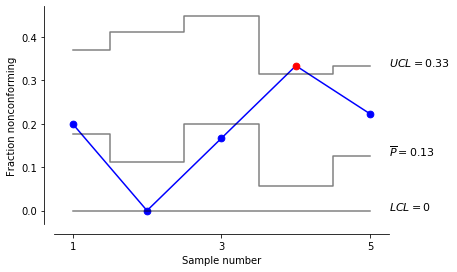

In [6]:
#Script 4.1
#RISK-ADJUSTED P-CHART
#import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
data = read_excel()#upload Chap4.xlsx Padjusted tab
#initialize parametes
L = 2.
#find unique days
days = data.Day.unique()
#determine control limits, centerline, and the statistic to be monitored.
UCL = []
CL = []
LCL = []
Day = []
P = []
for i in days:
    dayi = data[data.Day==i]
    ni = len(dayi)
    sumphat1 = dayi.Probability.sum()/ni
    sumphat2 = sqrt(sum(dayi.Probability*(1.-dayi.Probability)))/ni
    UCLi = sumphat1 + L*sumphat2
    CLi =  sumphat1
    LCLi = max(0,sumphat1 - L*sqrt(sumphat2))
    Pi = float(dayi.Died.sum())/ni
    #append results
    UCL.append(UCLi )
    CL.append(CLi)
    LCL.append(LCLi)
    P.append(Pi)
    Day.append(i)
xr = P
#mark red the point that falls outside of the control limits. Otherwise, mark the point blue.
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    if (x1 > UCL[i] or x1 < LCL[i]):
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plot the adjusted p-chart using the step function for limits
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(P))
ax1.step(t, UCL, 'k-', alpha = 0.5, where = 'mid')
ax1.step(t, LCL, 'k-',alpha = 0.5,  where = 'mid')
ax1.step(t, CL, 'k-',alpha = 0.5, where = 'mid')
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Fraction nonconforming')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$\overline{P}=$'+str(round(CL[-1],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(UCL), step = 2), arange(1, len(UCL)+1, step = 2))
show()


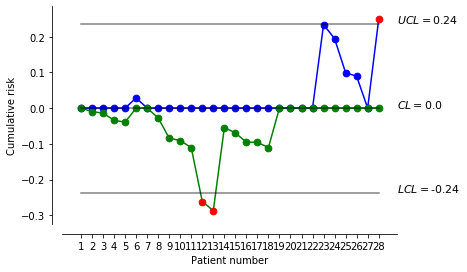

In [8]:
#Script 4.2
#RISK-ADJUSTED CUSUM
#import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an Excel spreadsheet. The column of "Probability" represents the risk, and the column of "Died" represents the outcome.
data = read_excel()#upload Chap4.xlsx Padjusted tab
#initialize parameters
OR1 = 2.
OR2 = 0.5
h1 = 4.5
#estimate the variance
N = len(data)+1
ssquare = sum(data.Probability*(1.-data.Probability))
sigma =sqrt(ssquare)/N
H = h1*sigma
#create control limits
UCL = [H]*N
CL = [0.]*N
LCL = [-H]*N
#compute C_^+ and C^- statistics to be monitored
Wa = [0]
Wb = [0]
for i in range(len(data)):
    xj = data.Died.iloc[i]
    pj = data.Probability.iloc[i]
    w1 = xj*log(OR1) -log(1.-pj + OR1*pj)
    w2 = xj*log(OR2) -log(1.-pj + OR2*pj)
    Wa.append(w1)
    Wb.append(-w2)
#cumsum is a cumulative function in python       
cum1 = cumsum(Wa)    
cum2 = cumsum(Wb) 
cplus = [max(i,0) for i in cum1]
cminus =  [min(i,0) for i in cum2]
c1 = cplus
c2 = cminus
#mark red the point that falls outside of the control limits. Otherwise, mark the point blue.
markers = []
colors = []
markers1 = []
colors1 = []
for i in range (N):
    x1 = c1[i]
    if x1 > UCL[i]:
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
for i in range (N):
    x2 = c2[i]
    if  x2 <LCL[i]:
        markers1.append('o')
        colors1.append('r')
    else:
        markers1.append('o')
        colors1.append('g')        
#plotting the adjusted CUSUM chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(CL))
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(c1,'b-',zorder=1)
ax1.plot(c2,'g-',zorder=1)
for x,y,c,m in zip(t, c1, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
for x,y,c,m in zip(t, c2, colors1, markers1):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)    
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Patient number')
ax1.set_ylabel('Cumulative risk')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[0],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$CL=$'+str(round(abs(CL[0]),2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[0],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(N, step = 1), arange(1, N+1, step = 1))
show()


                              ARMA Model Results                              
Dep. Variable:                     xt   No. Observations:                   26
Model:                     ARMA(1, 0)   Log Likelihood                 -87.694
Method:                       css-mle   S.D. of innovations              6.981
Date:                Wed, 19 Feb 2020   AIC                            181.388
Time:                        14:48:16   BIC                            185.162
Sample:                             0   HQIC                           182.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.3248      3.680     47.644      0.000     168.112     182.537
ar.L1.xt       0.6522      0.150      4.352      0.000       0.358       0.946
                                    Roots           

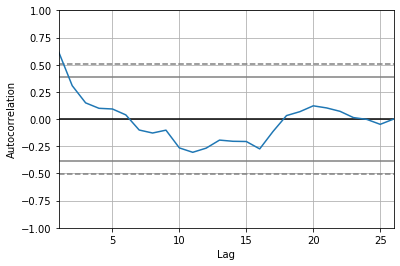

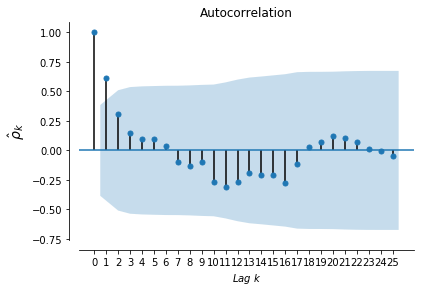

In [25]:
#Script 4.3
#ARIMA
#import modules
from pandas import *
from pylab import *
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
#import data from an Excel spreadsheet where xt is the column containing individual observations
data = read_excel()#upload Chap4.xlsx ARIMA tab
series = data.xt
dates = sm.tsa.datetools.dates_from_range('1980m1', length=len(series))
y = series
arma_mod = sm.tsa.ARIMA(y, order=(1,0,0))
arma_res = arma_mod.fit()
print(arma_res.summary())
autocorrelation_plot(series)
pyplot.show()

#plot main results
fig = plt.figure()
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=25, ax=ax1)
sns.despine(offset=10, trim = False)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(series), step = 1), arange(0, len(series), step = 1))
#label y-axis and x-axis
ax1.set_xlabel('$Lag$ $k$')
ax1.set_ylabel(r'$\hat{\rho}_k$', size = 14)
show()

C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


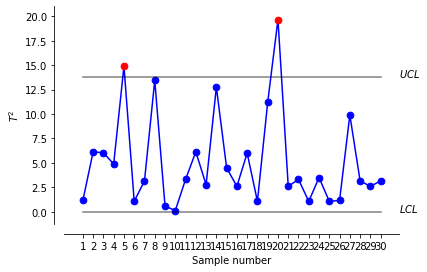

C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


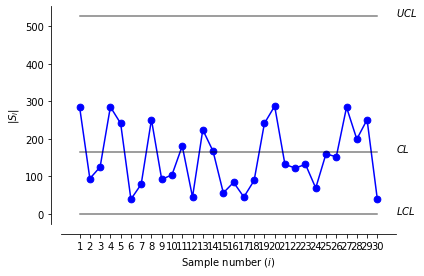

In [34]:
#Script 4.4
#MUTLIVARIATE CONTROL CHART
#import modules
import scipy.stats
from pandas import *
from pylab import *
import operator
import seaborn as sns
from functools import reduce
data =  read_excel()#upload Chap4.xlsx Multi tab
#iniliaze parameters and statistics for the control T^2 chart
u1 = data.mean()['Coding']
u2 = data.mean()['Abstracting']
s1 = data.mean()['VarC']
s2 = data.mean()['VarA']
s12 = data.mean()['CovCA']
n = 10 #given sample size in Example 4.4. Change this parameter as necessary
for i, j in zip(data.Coding, data.Abstracting):
    T2 = (n/((s1*s2) -s12**2))*(s2*(i-u1)**2 + s1*(j - u2)**2 - 2*s12*(i - u1)*(j-u2))
df_cov = DataFrame(array([[s1, s12],[s12,s2]]))
df_inv = array(DataFrame(np.linalg.inv(df_cov.values), df_cov.columns, df_cov.index))
df_det = np.linalg.det(df_cov.values)
p = len(df_cov)
m = len(data)*1.
a = p*(m-1)*(n-1.)
b = m*n-m-p+1.
d = a/float(b)
v1 = p
v2 = b
alpha = 0.001
F = scipy.stats.f.ppf(q=1-alpha, dfn=v1, dfd=v2)
#calculate control limits
UCLm = [d*F]*len(data)
LCLm = [0]*len(data)
#mark red the point that falls outside of the UCL. Otherwise, mark the point blue.
mv = []
markers = []
colors = []
for i in range (len(data)):
    x1 = data.ix[i]['Coding']
    x2 = data.ix[i]['Abstracting']        
    row = array([x1-u1,x2-u2])
    dot1 = dot(df_inv,row)
    dot2 = dot(row.T,dot1)
    mv.append(dot2*n)
    if dot2*n > UCLm[0]:
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting the T^2 chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCLm, 'k-', alpha = 0.5)
ax1.plot(LCLm, 'k-',alpha = 0.5)
ax1.plot(mv,'b-',zorder=1)
for x,y,c,m in zip(t, mv, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
ax1.set_xlabel('Sample number')
ax1.set_ylabel('$T^2$')
ax1.annotate ('$UCL$', xy = (xlim()[1], list(UCLm)[-1]), xytext = (xlim()[1],list(UCLm)[-1]))
ax1.annotate ('$LCL$', xy = (xlim()[1], list(LCLm)[-1]), xytext = (xlim()[1],list(LCLm)[-1]))
#set xticks to start from one since Python starts counting from zero
N = len(UCLm)
xticks(arange(N, step = 1), arange(1, N+1, step = 1))
show()
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# GV chart for variability
prodlist1 = []
prodlist2 = []
for i in range(1, p+1):
    prodlist1.append(n-i)
for i in range(1, p+1):
    prodlist2.append(n-i + 2.)
prod1 = reduce(operator.mul, prodlist1, 1)*1.
prod2 = reduce(operator.mul, prodlist2, 1)*1.   
b1 = (1./((n-1.)**p))*prod1
b2 = ((1./((n-1.)**(2*p)))*prod1)*(prod2 - prod1)
UCLgv = [(df_det/b1)*(b1+3.*sqrt(b2))]*len(data)
LCLgv = [max(0,(df_det/b1)*(b1-3.*sqrt(b2)))]*len(data)
CLgv = [df_det]*len(data)
#mark red the point that falls outside of the UCL. Otherwise, mark the point blue.
gv = [] 
markers = []
colors = []
for i in range(len(data)):
    s1i = float(data.ix[i]['VarC'])
    s2i = float(data.ix[i]['VarA'])
    s12i = float(data.ix[i]['CovCA'])
    Si = DataFrame(array([[s1i, s12i],[s12i,s2i]]))
    Ai = Si
    DAi = np.linalg.det(Ai)
    gv.append(DAi)
    if (DAi > UCLgv[0] or  DAi < LCLgv[0]):
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plot the GV chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCLgv, 'k-', alpha = 0.5)
ax1.plot(LCLgv, 'k-',alpha = 0.5)
ax1.plot(CLgv, 'k-',alpha = 0.5)
ax1.plot(gv,'b-',zorder=1)
for x,y,c,m in zip(t, gv, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
ax1.set_xlabel('Sample number ($i$)')
ax1.set_ylabel('$|S_i|$')
ax1.annotate ('$UCL$', xy = (xlim()[1], list(UCLgv)[-1]), xytext = (xlim()[1],list(UCLgv)[-1]))
ax1.annotate ('$CL$', xy = (xlim()[1], list(CLgv)[-1]), xytext = (xlim()[1],list(CLgv)[-1]))
ax1.annotate ('$LCL$', xy = (xlim()[1], list(LCLgv)[-1]), xytext = (xlim()[1],list(LCLgv)[-1]))
#set xticks to start from one since Python starts counting from zero
N = len(UCLgv)
xticks(arange(N, step = 1), arange(1, N+1, step = 1))
show()
